<a href="https://colab.research.google.com/github/Bijayanee/CI_Projects/blob/main/PerceptronIrisFlower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import Libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

Step 2: Load and Prepare the Dataset

In [ ]:
# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]
y = (iris.target == 0).astype(int)  # Binary: 1 if Setosa, else 0

In [ ]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Step 3: Define a Single-Layer Perceptron

In [ ]:
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        out = self.linear(x)
        return torch.sigmoid(out)

Step 4: Initialize Model, Loss, Optimizer

In [ ]:
model = Perceptron(input_dim=2)
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

Step 5: Train the Model

In [ ]:
losses = []
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 0.5477
Epoch [20/100], Loss: 0.4279
Epoch [30/100], Loss: 0.3529
Epoch [40/100], Loss: 0.3026
Epoch [50/100], Loss: 0.2668
Epoch [60/100], Loss: 0.2400
Epoch [70/100], Loss: 0.2191
Epoch [80/100], Loss: 0.2024
Epoch [90/100], Loss: 0.1887
Epoch [100/100], Loss: 0.1772


Step 6: Plot Training Loss

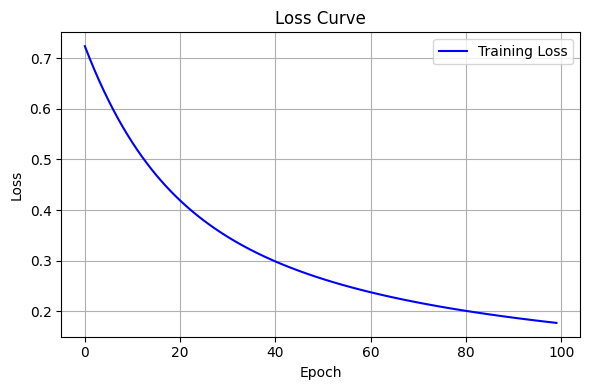

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(losses, label="Training Loss", color="blue")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Step 7: Plot Decision Boundary

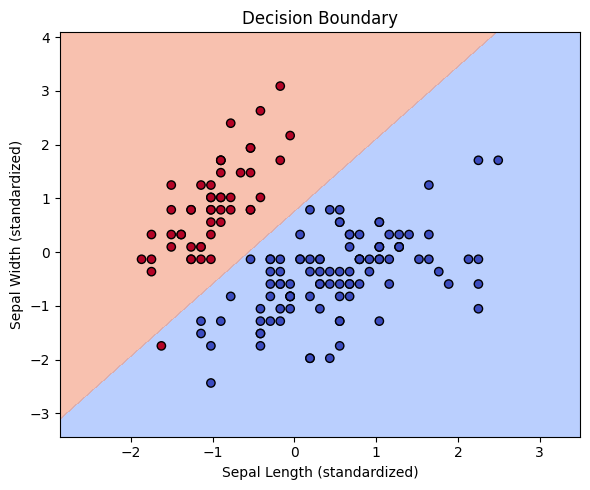

In [ ]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        preds = model(grid)
    Z = preds.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="coolwarm", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.reshape(-1), cmap="coolwarm", edgecolor='k')
    plt.title("Decision Boundary")
    plt.xlabel("Sepal Length (standardized)")
    plt.ylabel("Sepal Width (standardized)")
    plt.tight_layout()
    plt.show()

# Call the plot function
plot_decision_boundary(model, X.numpy(), y.numpy())

Step 6: Evaluate the Model

In [ ]:
model.eval()
with torch.no_grad():
    predictions = model(X_test)
    predicted_classes = (predictions >= 0.5).float()
    accuracy = (predicted_classes == y_test).float().mean()
    print(f"\nAccuracy on Test Set: {accuracy.item() * 100:.2f}%")


Accuracy on Test Set: 100.00%
